In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [23]:
#load csv
df = pd.read_csv(r"/content/Iris.csv");

print(df.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [24]:
#feature splitting
features = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
target = df['Species']



In [25]:
#handling missing values
features=features.fillna(features.mean())

In [26]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,stratify=target,random_state=42)

In [27]:
#fit and train the model
model = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [28]:
#make predictions
predict=model.predict(X_test)

In [29]:
#evaluations
accuracy = accuracy_score(y_test,predict)
classification_rep = classification_report(y_test,predict)
cm = confusion_matrix(y_test,predict)

print("\n Accuracy : ",accuracy)
print("\n Classification Report : \n",classification_rep)
print("\n Confusion Matrix : \n",cm)


 Accuracy :  0.9111111111111111

 Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.88        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45


 Confusion Matrix : 
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


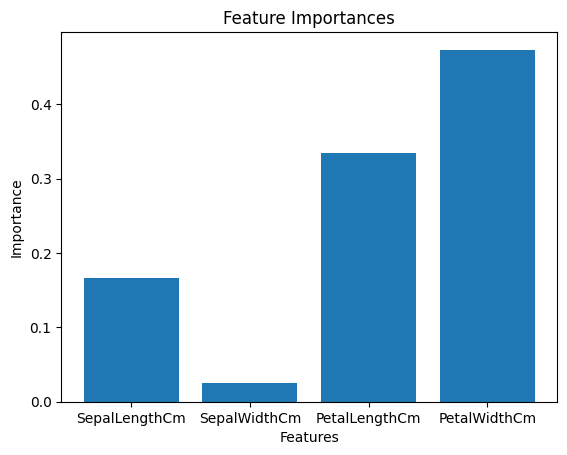

In [30]:
#visualization
importances = model.feature_importances_
plt.bar(features.columns, importances)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

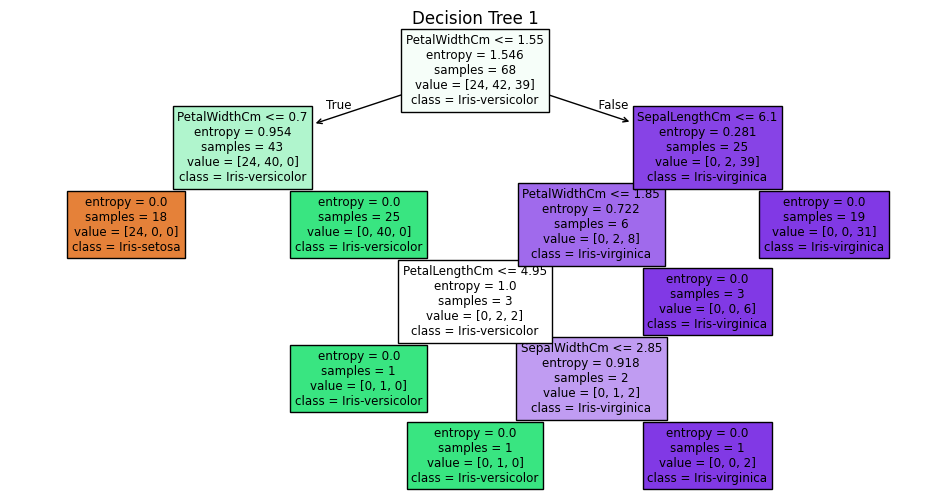

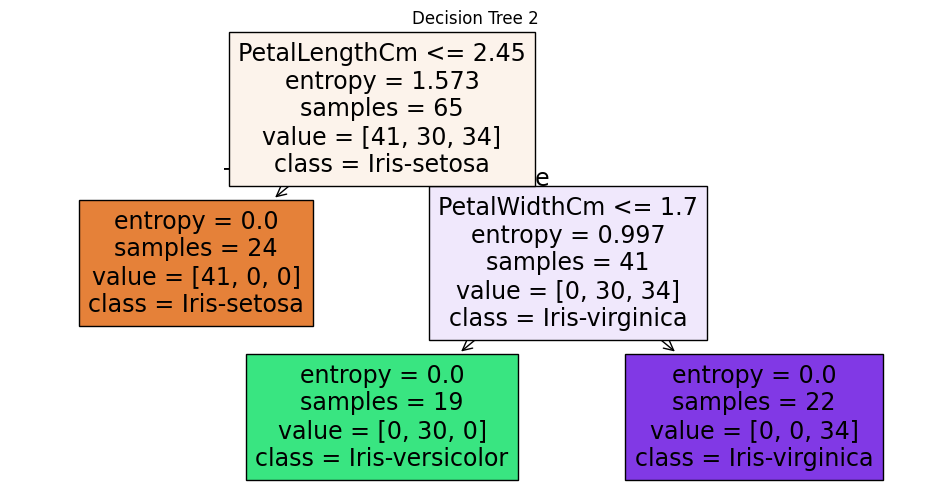

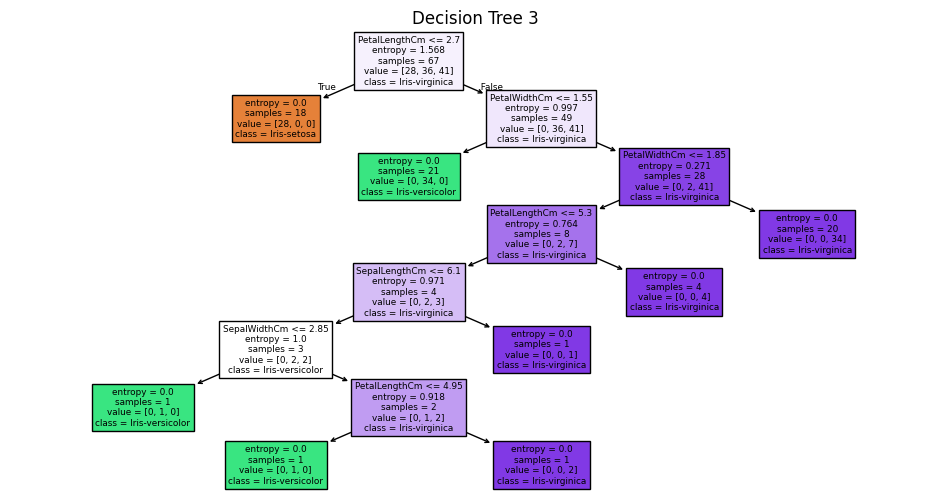

In [34]:
# Visualize each tree      IF ASKED DO IT ONLY
from sklearn.tree import plot_tree
for i in range(3):      # visualize 3 trees only
    plt.figure(figsize=(12,6))
    plot_tree(
        model.estimators_[i],
        feature_names=features.columns,
        class_names=model.classes_,
        filled=True
    )
    plt.title(f"Decision Tree {i+1}")
    plt.show()